## RNN(순환신경망)과 LSTM
- 연속된 데이터 묶음을 처리한다.
- 하나의 데이터 묶음은 순서를 가진다.(앞과 뒤를 구분)
- 이러한 데이터 묶음을 시퀀스(Sequence) 또는 시계열이라고 한다.
- 연속된 단어들로 이루어진 문장, 며칠간의 종가로 이루어진 주식 가격 등
- RNN : Recurrent Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### lmdb 불러오기

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [6]:
word_index = imdb.get_word_index()
len(word_index)

88584

### 문장의 단어수를 500개로 제한

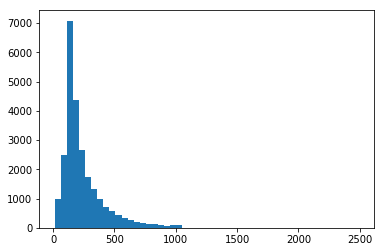

In [7]:
doc_len = [len(x) for x in X_train]
plt.hist(doc_len, bins=50)
pass

In [9]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 문장의 뒤에서 단어 500개를 가져온다.
# 문장의 단어수가 500개를 넘으면 앞부분을 자른다.
# 문장이 짧은 경우 앞부분을 0으로 채운다.

### Sequence 개념
- 한 문장은 순차적인 단어들로 이루어져 있다.
- 이러한 연속적인 단어들로 이루어진 문장과 같은 것을 Sequence라고 한다.
- Sequence의 한 항목은 복수의 속성값을 가질 수 있다.

> 한 문장 : [1,31,27,5] <br>
> 한 단어 : 31 -> [0,0,...,1,....,0,0]


### SimpleRNN 적용

In [11]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [12]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

W0829 18:25:49.190235 4631799232 deprecation_wrapper.py:119] From /Users/nani/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 18:25:49.278469 4631799232 deprecation_wrapper.py:119] From /Users/nani/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 18:25:49.295642 4631799232 deprecation_wrapper.py:119] From /Users/nani/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                6208      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


### 모델 설명
- Embedding은 단어번호들을 입력으로 받는다.
> 10000 : 단어집의 총 단어수 <br>
> 32 : 10000차원을 32차원으로 줄임 <br>
> (None, 500) → (None, 500, 10000) → (None, 500, 32)

- SimpleRNN은 연속된 단어들(Sequence)를 입력받아 최종 단어 하나를 출력한다.
> (None, 500, 32) → (None, 32) <br>
> SimpleRNN(32)에서 32는 출력 차원을 의미한다.(64와 같이 다른 수를 쓸 수 있다.)

In [15]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

W0829 18:35:37.963375 4631799232 deprecation_wrapper.py:119] From /Users/nani/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 18:35:38.006984 4631799232 deprecation_wrapper.py:119] From /Users/nani/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0829 18:35:38.022399 4631799232 deprecation.py:323] From /Users/nani/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 18:35:38.470000 4631799232 deprecation_wrapper.py:119] From /Users/nani/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.ass

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6084 - acc: 0.6593 - val_loss: 0.5543 - val_acc: 0.7262
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.4276 - acc: 0.8176 - val_loss: 0.3757 - val_acc: 0.8418
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3546 - acc: 0.8553 - val_loss: 0.4176 - val_acc: 0.8068
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2941 - acc: 0.8828 - val_loss: 0.4139 - val_acc: 0.8184
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2702 - acc: 0.8948 - val_loss: 0.4186 - val_acc: 0.8102
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2352 - acc: 0.9097 - val_loss: 0.3845 - val_acc: 0.8566
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2128 - acc: 0.9196 - val_loss: 0.4316 - val_acc:

Text(6, 0.87, 'val_acc_max = 0.8566')

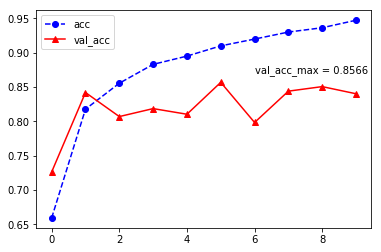

In [16]:
h = history.history
# acc
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(6, 0.87, 'val_acc_max = ' + str(max(h['val_acc'])))

Text(3, 0.3, 'val_loss_min = 0.37565727019309997')

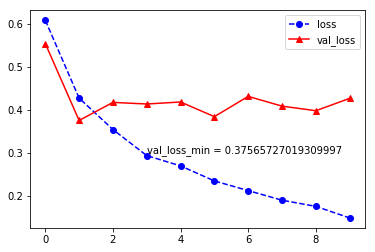

In [17]:
# loss
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(3, 0.3, 'val_loss_min = ' + str(min(h['val_loss'])))

In [18]:
help(SimpleRNN)

Help on class SimpleRNN in module keras.layers.recurrent:

class SimpleRNN(RNN)
 |  SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, **kwargs)
 |  
 |  Fully-connected RNN where the output is to be fed back to input.
 |  
 |  # Arguments
 |      units: Positive integer, dimensionality of the output space.
 |      activation: Activation function to use
 |          (see [activations](../activations.md)).
 |          Default: hyperbolic tangent (`tanh`).
 |          If you pass `None`, no activation is applied
 |          (ie. "linear" activation: `a(x) = x`).
 |      use_bias: Boolean, wh

- SimpleRNN의 디폴트 activation은 'tanh'이다.
- return_sequences 값을 주의해서 보자.(디폴트는 False)

### RNN을 겹쳐서 사용하기
- return_sequence 옵션을 사용하면 각 RNN cell의 출력값을 반환한다.
- 이 출력값을 입력으로 받는 RNN층을 위에 쌓을 수 있다.

In [21]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 500, 32)           2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 500, 16)           784       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 323,409
Trainable params: 323,409
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.6524 - acc: 0.5948 - val_loss: 0.5104 - val_acc: 0.7534
Epoch 2/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.4299 - acc: 0.8095 - val_loss: 0.4210 - val_acc: 0.8260
Epoch 3/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.3072 - acc: 0.8745 - val_loss: 0.3789 - val_acc: 0.8400
Epoch 4/10
20000/20000 [==============================] - 49s 2ms/step - loss: 0.2120 - acc: 0.9192 - val_loss: 0.4660 - val_acc: 0.8218
Epoch 5/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1258 - acc: 0.9560 - val_loss: 0.4955 - val_acc: 0.8232
Epoch 6/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0691 - acc: 0.9761 - val_loss: 0.5441 - val_acc: 0.8428
Epoch 7/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.0375 - acc: 0.9879 - val_loss: 0.7239 - val_acc:

Text(6, 0.87, 'val_acc_max = 0.8428')

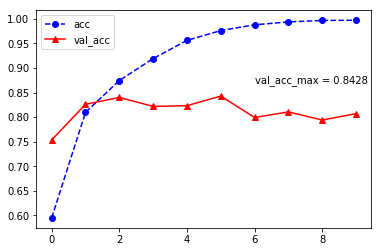

In [24]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(6, 0.87, 'val_acc_max = ' + str(max(h['val_acc'])))

Text(3, 0.3, 'val_loss_min = 0.3788519392967224')

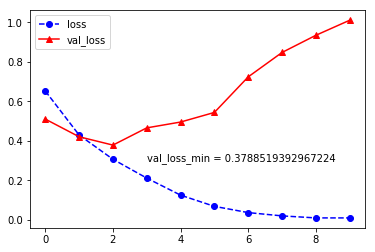

In [25]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(3, 0.3, 'val_loss_min = ' + str(min(h['val_loss'])))

### 그래디언트 소실 문제
- RNN은 하나의 층에서도 반복적인 RNN cell을 적용하므로, 실제로는 많은 층을 거치게 된다.
- 최상위의 손실값을 조금씩 아래도 나누어 주어 기울기의 가중치를 부여하는 것이 신경망의 핵심 알고리즘인 역전파(Backpropagation)이다.
- 층을 많이 거치므로 초기층들의 영향력은 점점 줄어들게 된다. 즉, 문장에서 처음 나오는 단어들은 거의 무시되는 경향이 생긴다.
- 이러한 문제를 Vanishing Gradient Problem이라고 부른다.
- 그래디언트 소실 문제를 해결하기 위해 LSTM과 GRU가 제안되었고, SimpleRNN은 거의 사용되지 않는다.

### LSTM 적용
- Long Short Term Memory
- 그래디언트 소실 문제(Vanishing gradient problem)을 해결하기 위해, 이전 타임의 영향력을 좀 더 키운 것이다.
- LSTM의 역할 : <b>과거 정보를 나중에 다시 주입하여 그래디언트 소실 문제를 해결</b>

In [26]:
from keras.layers import LSTM

In [27]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 95s 5ms/step - loss: 0.4953 - acc: 0.7662 - val_loss: 0.3526 - val_acc: 0.8520
Epoch 2/5
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2828 - acc: 0.8909 - val_loss: 0.3756 - val_acc: 0.8372
Epoch 3/5
20000/20000 [==============================] - 90s 5ms/step - loss: 0.2291 - acc: 0.9120 - val_loss: 0.2815 - val_acc: 0.8910
Epoch 4/5
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2039 - acc: 0.9261 - val_loss: 0.2877 - val_acc: 0.8902
Epoch 5/5
20000/20000 [==============================] - 84s 4ms/step - loss: 0.1779 - acc: 0.9379 - val_loss: 0.3166 - val_acc: 0.8866


Text(2.5, 0.88, 'val_acc_max = 0.891')

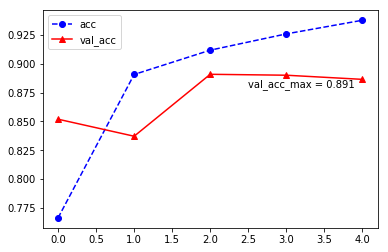

In [31]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(2.5, 0.88, 'val_acc_max = ' + str(max(h['val_acc'])))

Text(2, 0.28, 'val_loss_min = 0.28154038915634155')

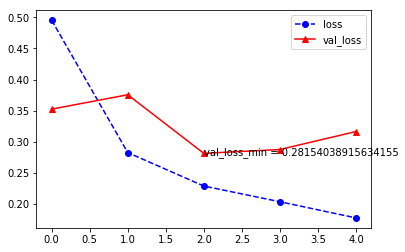

In [32]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(2, 0.28, 'val_loss_min = ' + str(min(h['val_loss'])))

- 결과 분석
>- 계산부하에 비해 썩 좋은 결가가 나오지는 않는다.<br>
>- 임베딩 차원을 튜닝하면 더 좋은 결과를 얻을 가능성이 크다.<br>
>- 리뷰를 전체적으로 길게 분석하는 것(LSTM이 잘 하는 일)은 리뷰 분석과 같은 감성 분류 문제에 별로 도움이 되지 않는다.<br>
>- 이런 문제는 각 리뷰에 어떤 단어가 얼마나 나타나는 지를 보는 것이 더 나을 수 있다.(완전 연결 네트워크)<br>
>- LSTM에 적합한 분야 : <b>질문-응답과 기계 번역</b>

### 복수의 LSTM층

In [33]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 64)           24832     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 357,281
Trainable params: 357,281
Non-trainable params: 0
_________________________________________________________________


### 양방향 RNN 적용
- Sequence의 데이터를 정방향과 반대방향 두 번을 적용하여 결과를 합친다.
- 문장이라면 단어들을 거꾸로 적용하는 것이다.
- 문장 평가에는 효과가 있지만 주식 가격 변동에는 적합하지 않다. 왜??

In [35]:
from keras.layers import LSTM, Bidirectional

model = Sequential()
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 154s 8ms/step - loss: 0.5097 - acc: 0.7595 - val_loss: 0.3882 - val_acc: 0.8416
Epoch 2/5
20000/20000 [==============================] - 146s 7ms/step - loss: 0.3060 - acc: 0.8819 - val_loss: 0.2794 - val_acc: 0.8908
Epoch 3/5
20000/20000 [==============================] - 135s 7ms/step - loss: 0.2391 - acc: 0.9105 - val_loss: 0.5567 - val_acc: 0.8154
Epoch 4/5
20000/20000 [==============================] - 133s 7ms/step - loss: 0.2037 - acc: 0.9253 - val_loss: 0.2906 - val_acc: 0.8814
Epoch 5/5
20000/20000 [==============================] - 132s 7ms/step - loss: 0.1790 - acc: 0.9356 - val_loss: 0.3469 - val_acc: 0.8740


Text(2.5, 0.88, 'val_acc_max = 0.8908')

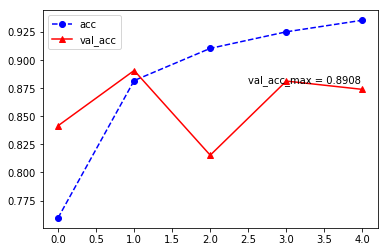

In [38]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(2.5, 0.88, 'val_acc_max = ' + str(max(h['val_acc'])))

Text(2, 0.28, 'val_loss_min = 0.2793794418811798')

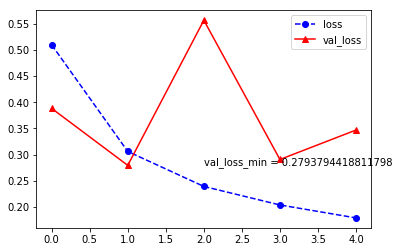

In [39]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(2, 0.28, 'val_loss_min = ' + str(min(h['val_loss'])))

### Conv1D
- 시퀀스를 높이가 없는 이미지로 생각하여 구간 윈도우 상에서 패턴을 찾아낸다.
- (높이, 넓이, 채널) → (단어, 임베딩차원)
- 긴 시퀀스에서 특정 패턴을 찾아내는 데 효과가 크고, RNN에 비해 속도가 빠르다.
- Conv1D, MaxPooling1D, GlobalMaxPooling1D등 사용